In [101]:
import mglearn
import matplotlib.pyplot as pl
import numpy as np

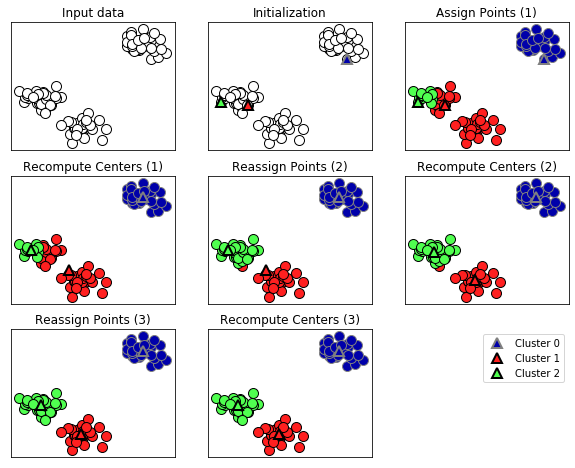

In [71]:
mglearn.plots.plot_kmeans_algorithm()

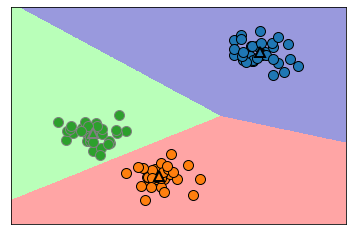

In [72]:
mglearn.plots.plot_kmeans_boundaries()

In [73]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X,y=make_blobs(random_state=1)
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [74]:
kmeans.labels_

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

In [75]:
kmeans.predict(X)

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

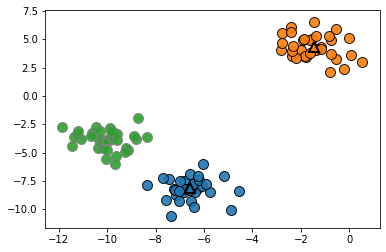

In [76]:
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o',
                        alpha=0.9)
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                        kmeans.cluster_centers_[:,1],[0,1,2],
                        markers='^',markeredgewidth=2)

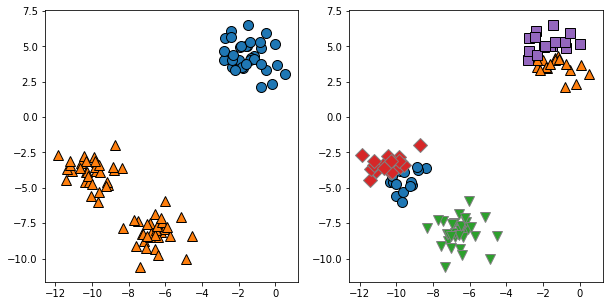

In [79]:
fig,axes=pl.subplots(1,2,figsize=(10,5))
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
assignments=kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[0])
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
assignments=kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[1])

# Failure cases of k-means
Even if you know the “right” number of clusters for a given dataset, k-means might
not always be able to recover them. Each cluster is defined solely by its center, which
means that each cluster is a convex shape. As a result of this, k-means can only capture
relatively simple shapes. k-means also assumes that all clusters have the same
“diameter” in some sense; it always draws the boundary between clusters to be exactly
in the middle between the cluster centers.

Text(0, 0.5, 'Feature 1')

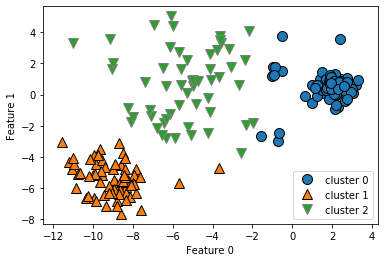

In [100]:
X_varied,y_varied=make_blobs(n_samples=200,cluster_std=[1.0,2.5,0.5],
                            random_state=170)
y_pred=KMeans(n_clusters=3,random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0],X_varied[:,1],y_pred)
pl.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
pl.xlabel("Feature 0")
pl.ylabel("Feature 1")

In [121]:
X,y=make_blobs(random_state=170,n_samples=600)
rng=np.random.RandomState(74)
transformation=rng.normal(size=(2,2))
X=np.dot(X,transformation)

In [125]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
y_pred=kmeans.predict(X)

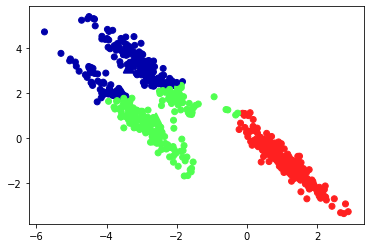

In [123]:
pl.scatter(X[:,0],X[:,1],c=y_pred,cmap=mglearn.cm3)
pl.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
          marker='^',c=[0,1,2],s=100,linewidth=2,cmap=mglearn.cm3)

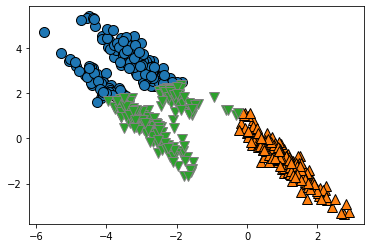

In [124]:
mglearn.discrete_scatter(X[:,0],X[:,1],y_pred)

In [127]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=200,noise=0.05,random_state=0)
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
y_pred=kmeans.predict(X)

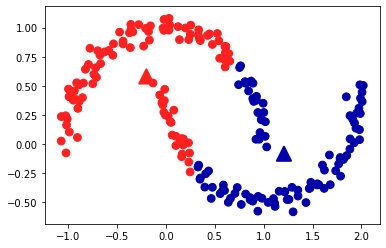

In [138]:
pl.scatter(X[:,0],X[:,1],c=y_pred,cmap=mglearn.cm2,s=60)
pl.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
          marker='^',s=200,c=[mglearn.cm2(0),mglearn.cm2(1)],
          linewidth=2)

In [141]:
X,y=make_moons(n_samples=200,noise=0.05,random_state=0)
kmeans=KMeans(n_clusters=10,random_state=0)
kmeans.fit(X)
y_pred=kmeans.predict(X)

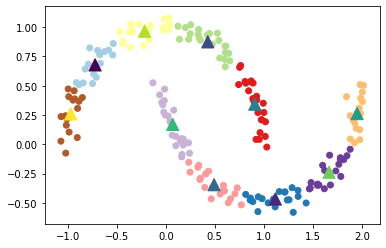

In [150]:
pl.scatter(X[:,0],X[:,1],c=y_pred,cmap='Paired')
pl.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
          marker='^',s=150,c=range(kmeans.n_clusters),cmap='viridis')

In [153]:
distance_features=kmeans.transform(X)
distance_features.shape

(200, 10)

In [154]:
distance_features

array([[1.54731274, 1.03376805, 0.52485524, ..., 1.14060718, 1.12484411,
        1.80791793],
       [2.56907679, 0.50806038, 1.72923085, ..., 0.149581  , 2.27569325,
        2.66814112],
       [0.80949799, 1.35912551, 0.7503402 , ..., 1.76451208, 0.71910707,
        0.95077955],
       ...,
       [1.12985081, 1.04864197, 0.91717872, ..., 1.50934512, 1.04915948,
        1.17816482],
       [0.90881164, 1.77871545, 0.33200664, ..., 1.98349977, 0.34346911,
        1.32756232],
       [2.51141196, 0.55940949, 1.62142259, ..., 0.04819401, 2.189235  ,
        2.63792601]])

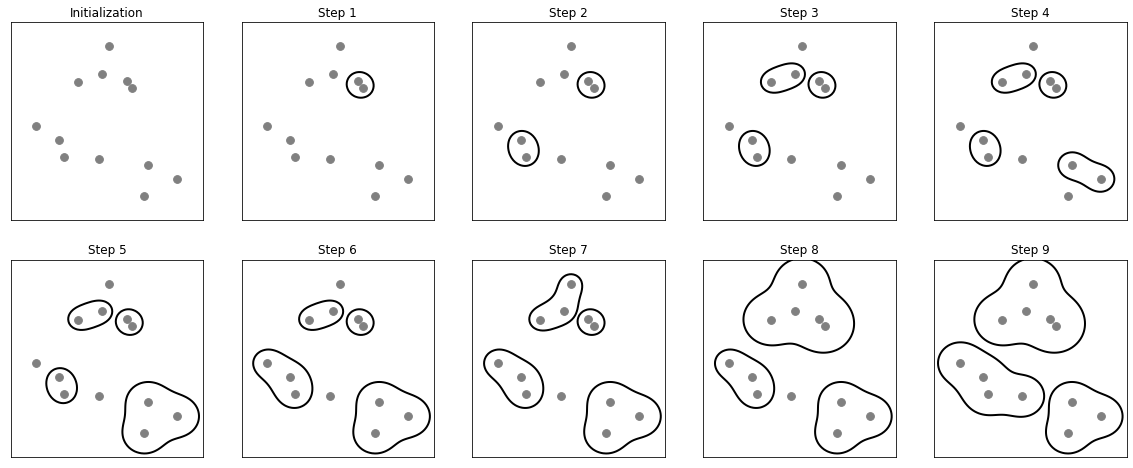

In [155]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

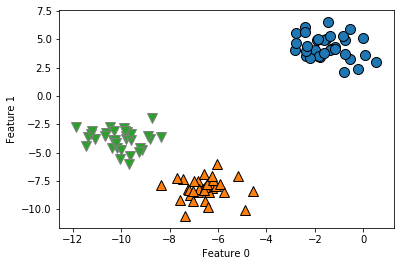

In [199]:
from sklearn.cluster import AgglomerativeClustering
X,y=make_blobs(random_state=1)
agg=AgglomerativeClustering(n_clusters=3)
assignment=agg.fit_predict(X)
mglearn.discrete_scatter(X[:,0],X[:,1],assignment)
pl.xlabel("Feature 0")
pl.ylabel("Feature 1")

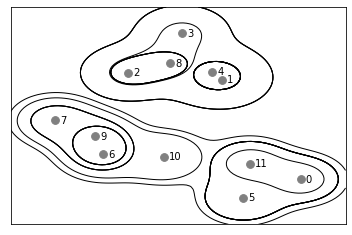

In [159]:
mglearn.plots.plot_agglomerative()

Text(120.0, 4, ' three clusters')

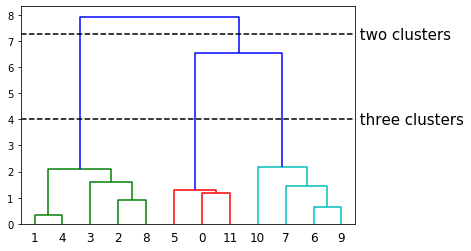

In [176]:
from scipy.cluster.hierarchy import dendrogram,ward
X,y=make_blobs(random_state=0,n_samples=12)
linnkage_array=ward(X)
dendrogram(linnkage_array)
ax=pl.gca()
bounds=ax.get_xbound()
ax.plot(bounds,[7.25,7.25],'--',c='k')
ax.plot(bounds,[4,4],'--',c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})


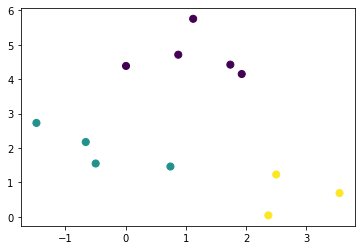

In [194]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
a=kmeans.predict(X)
pl.scatter(X[:,0],X[:,1],c=a,s=50)